In [48]:
##PACKAGE IMPORTING
import pandas as pd
from dask.distributed import Client, progress ##For Progress Dashboard
import dask.dataframe as dd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from ggplot import *

In [ ]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

In [15]:
#SAVE YOUR MELTED DATAFRAME WITH CHUNCK OPTION
##ARGUMENT CHUNK SIZE IS DEFINED
%time sales_01 = pd.read_csv(r"C:\Users\Selvamani\Desktop\sales_train_validation.csv",chunksize=1000)
def Melt_Save(df,Melt_Vars_List):
    for chunk in tqdm.tqdm_notebook(sales_01):
        result = chunk.melt(id_vars= Melt_Vars_List)
        # export the results into a new file and append for each iteration using mode
        result.to_csv("C:/Users/Selvamani/Desktop/Master/main.csv", index=False , mode='a',header = False)
Melt_Save(sales_01,Melt_Vars_List)

Wall time: 4.98 ms


In [43]:
##PARALLEL PROCESSING STARTS HERE USING DASK
Column_Name_List = ['id','item_id','dept_id','cat_id','store_id','state_id' ,'variable' ,'value']
%time Raw_M_Data = dd.read_csv("C:/Users/Selvamani/Desktop/Master/main.csv",names=Column_Name_List,header=None)
%time print(Raw_M_Data.head())

Wall time: 186 ms
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id variable  value  
0       CA      d_1      0  
1       CA      d_1      0  
2       CA      d_1      0  
3       CA      d_1      0  
4       CA      d_1      0  
Wall time: 5 s


In [59]:
"Finding Top 10 Products Sold On an average per day"
%time Mean_Values = Raw_M_Data.groupby(['store_id']).value.mean().compute()

Wall time: 9min 22s


KeyError: 'x'

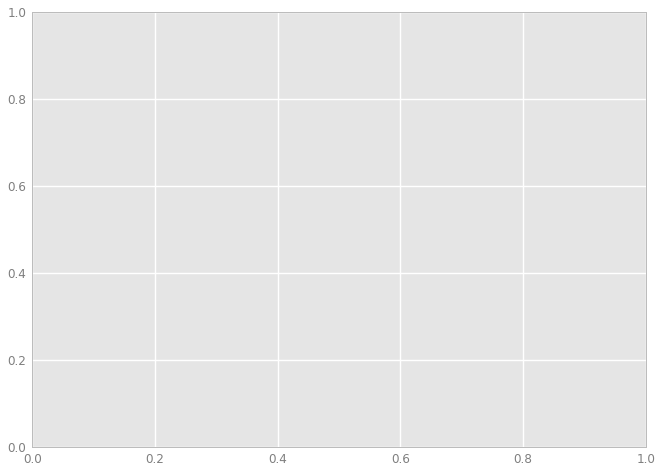

In [58]:
##TOP 25 PRODUCTS SOLD ACROSS ALL 10 STORES
p = ggplot(aes(x='',y='value'), data=pd.DataFrame(Mean_Values).iloc[-25:,])
p + geom_bar() 
p

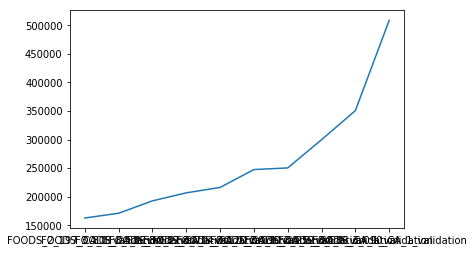

In [41]:
plt.plot(Raw_M_Data.sort_values()[-10:])